Pawel Pienkosz 14349299 | Ilia Pokrishchenko 13815342

# Project goals: 
1) Classifying Users by Nationality + Domestic/International to, adjust for bias
2) Clustering hotels based on tags e.g which hotels are more often booked for leisure trips and which are for business (additionally we can see how that affects the average rating and create a map with the clusters) 
3) Satisfaction predictor* (Reviewer_Score) based on the point 1), stay duration, city, country total_number_of_reviews, Family/solo tags, the number of reviews the reviewer has given
The goal is to create a recommendation model for people planning their vaction, so I imagine they select the dependent variables like nationlality, duration, purpose of the trip and the model estimates which hotel they would rank the highest aka liked the most

# Importing and Exploring Data

We import the dataset into pandas dataframe.

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("Hotel_Reviews.csv")

We explore the data using head(), info(), and desribe() functions.

In [4]:
data.head(10)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[' Leisure trip ', ' Group ', ' Duplex Double ...",10 days,52.360576,4.915968
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",17 days,52.360576,4.915968
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",17 days,52.360576,4.915968
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/9/2017,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",25 days,52.360576,4.915968
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/8/2017,7.7,Hotel Arena,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[' Leisure trip ', ' Couple ', ' Large King Ro...",26 days,52.360576,4.915968


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [6]:
data.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


We also explore how many unique hotels and unique nationalities of custormers are in the dataset. We assume only one hotel is registered at one address.

In [7]:
unique_hotels = data["Hotel_Address"].unique()
unique_nationalities = data["Reviewer_Nationality"].unique()
print(f"There are {len(unique_hotels)} unique hotels.")
print(f"There are {len(unique_nationalities)} unique reviewer's nationalities.")

There are 1493 unique hotels.
There are 227 unique reviewer's nationalities.


# Preprocessing

## Handeling Missing Values

As we could see in the output from the describe function `lat` and `lng` attributes have lower count than other attributes which suggests some records are missing these values. We confirm this with isnull() function.

In [8]:
data.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

As suspected these attributes have missing values. We decided to fill them in.

First we extract the rows with missing geographical location.

In [9]:
rows_with_missing_values = data[data['lat'].isnull() | data['lng'].isnull()]


Then we extract distinct hotels with missing values.

In [10]:
distinct_hotels = rows_with_missing_values[['Hotel_Name', 'Hotel_Address']].drop_duplicates()


In [11]:
distinct_hotels

,Hotel_Name,Hotel_Address
99488,Mercure Paris Gare Montparnasse,20 Rue De La Ga t 14th arr 75014 Paris France
116738,Holiday Inn Paris Montmartre,23 Rue Damr mont 18th arr 75018 Paris France
177657,Maison Albar Hotel Paris Op ra Diamond,4 rue de la P pini re 8th arr 75008 Paris France
282265,NH Collection Barcelona Podium,Bail n 4 6 Eixample 08010 Barcelona Spain
327680,City Hotel Deutschmeister,Gr nentorgasse 30 09 Alsergrund 1090 Vienna Au...
338919,Hotel Park Villa,Hasenauerstra e 12 19 D bling 1190 Vienna Austria
351449,Fleming s Selection Hotel Wien City,Josefst dter Stra e 10 12 08 Josefstadt 1080 V...
352107,Cordial Theaterhotel Wien,Josefst dter Stra e 22 08 Josefstadt 1080 Vien...
365418,Hotel Daniel Vienna,Landstra er G rtel 5 03 Landstra e 1030 Vienna...
395735,Roomz Vienna,Paragonstra e 1 11 Simmering 1110 Vienna Austria


As we can see the hotels with missing values are in either Paris (France), Barcelona (Spain) or Vienna (Austria). We decieded to fill in the missing values for the hotels using the latitude and longtitude of the corresponding city.

In [12]:
cities_location = {"Barcelona":(41.390205, 2.154007),
                  "Vienna" : (48.210033, 16.363449),
                  "Paris":(48.864716, 2.349014)}

To do that we extract city and country from the address attribute for each record. These values can also be useful in future analysis.

In [13]:
def extract_city(row):
    
    address = row["Hotel_Address"].split(" ")
    city = address[-2]
    # we fix for Unoted Kingdom
    if city == "United":
        city = address[-3]
    return city

def extract_country(row):
    address = row["Hotel_Address"].split(" ")
    country = address [-1]
    # we fix for Unoted Kingdom
    if country == "Kingdom":
        country = "United Kingdom"


    return country

In [14]:
data["City"] = data.apply(extract_city, axis = 1)
data["Country"] = data.apply(extract_country, axis = 1)

In [15]:
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,City,Country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Amsterdam,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Amsterdam,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Amsterdam,Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Amsterdam,Netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Amsterdam,Netherlands


Then for the record with missing location we fill it in with coresponding cooridantes.

In [16]:
def fill_missing_location(row, cities_location):
    if pd.isnull(row['lat']) or pd.isnull(row['lng']):
        city = row['City']
        row['lat'], row['lng'] = cities_location[city]
    return row


In [17]:
data = data.apply(lambda row: fill_missing_location(row, cities_location), axis=1)

We check if it worked.

In [18]:
data.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
City                                          0
Country                                       0
dtype: int64

It did, there is no missing values left

## Days_since_reviews

As we could see in during exploration, `Days_since_reviews` attribute is currently a string. To utilise it in our analysis we decided to transform it to integer representing the number of days.

In [19]:
def str_to_int_days(row):
    to_list = row["days_since_review"].split(" ")
    days = int(to_list[0])

    return days

In [20]:
data["days_since_review"] = data.apply(lambda row: str_to_int_days(row), axis=1)


We evalute if it worked.

In [21]:
data["days_since_review"]

0           0
1           0
2           3
3           3
4          10
         ... 
515733    704
515734    712
515735    715
515736    717
515737    725
Name: days_since_review, Length: 515738, dtype: int64

## Tags

To be able to classify or cluster reviwers by groups we decided to transform the tags attribute to binary attributes for each tag.

We start with formatting the `Tags` attribute.

In [22]:
def format_tag(tag):
    tag = tag.replace("[", "").replace("'", "").replace("]", "").strip().replace(" ","_").split("_,__")
    return tag

In [23]:
data["Tags"] = data["Tags"].apply(lambda x: format_tag(x))

In [24]:
data["Tags"][0]

['Leisure_trip', 'Couple', 'Duplex_Double_Room', 'Stayed_6_nights']

In [25]:
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,City,Country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[Leisure_trip, Couple, Duplex_Double_Room, Sta...",0,52.360576,4.915968,Amsterdam,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[Leisure_trip, Couple, Duplex_Double_Room, Sta...",0,52.360576,4.915968,Amsterdam,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[Leisure_trip, Family_with_young_children, Dup...",3,52.360576,4.915968,Amsterdam,Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[Leisure_trip, Solo_traveler, Duplex_Double_Ro...",3,52.360576,4.915968,Amsterdam,Netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[Leisure_trip, Couple, Suite, Stayed_2_nights,...",10,52.360576,4.915968,Amsterdam,Netherlands


In [26]:
all_tags = set(tag for tags in data["Tags"] for tag in tags)

In [27]:
print(f"There are {len(all_tags)} distinct tags.")

There are 2428 distinct tags.


Since there are almost 2500 distinct tags we decided to focus on 30 most frequent ones and create 30 dummy binary variables.

In [28]:
from collections import Counter

all_tags = [tag for tags in data['Tags'] for tag in tags]

tag_counts = Counter(all_tags)

top_30_tags = [tag for tag in tag_counts.most_common(30)]


In [29]:
for tag in top_30_tags:
    data[tag[0]] = data['Tags'].apply(lambda tags: 1 if tag[0] in tags else 0)
    

In [30]:
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Superior_Double_or_Twin_Room,2_rooms,Stayed_6_nights,Standard_Twin_Room,Single_Room,Twin_Room,Stayed_7_nights,Executive_Double_Room,Classic_Double_or_Twin_Room,Superior_Twin_Room
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,...,0,0,1,0,0,0,0,0,0,0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,...,0,0,0,0,0,0,0,0,0,0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,...,0,0,0,0,0,0,0,0,0,0
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,...,0,0,0,0,0,0,0,0,0,0
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,...,0,0,0,0,0,0,0,0,0,0


The distribution of the 30 most frequent tags can be observed below. As we can see the frequency of the rest of tags can be consider negligable.

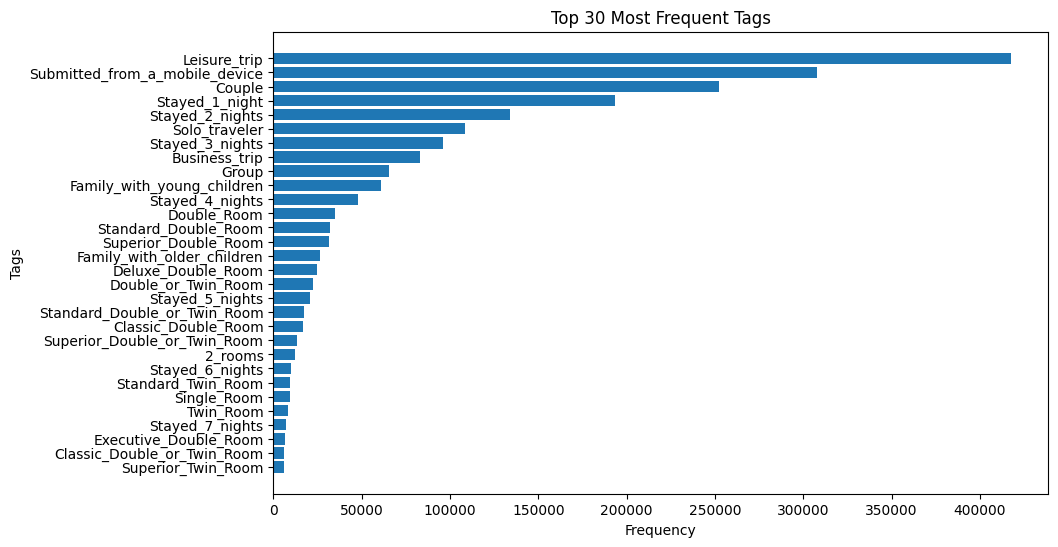

In [31]:
import matplotlib.pyplot as plt

tags, counts = zip(*tag_counts.most_common(30))

plt.figure(figsize=(10, 6))
plt.barh(tags, counts)
plt.gca().invert_yaxis()
plt.xlabel("Frequency")
plt.ylabel("Tags")
plt.title("Top 30 Most Frequent Tags")
plt.show()


## Nationality

We decided to create an additionaly binary attribute called `Domestic` to evalute the review was written by the customer from the same country as the hotel or from abroad.

In [32]:
def domestic(row):
    if row["Country"] == row["Reviewer_Nationality"]:
        return 1
    else:
        return 0


In [33]:
data["Domestic"] = data.apply(lambda row: domestic(row), axis = 1)

In [34]:
print(data["Domestic"].value_counts())

Domestic
0    515738
Name: count, dtype: int64


As we can see, the reviews are submitted only by the international visitors, thus we abandon this idea and drop the column `Domestic`.

In [35]:
data = data.drop("Domestic", axis=1)


## Duration of the trip

As we could see the tags include the trip duration. We decided to extract the duration as an integer for the analysis.

In [36]:
def duration_of_the_trip(row):
    tags = row["Tags"]
    for tag in tags:
        if "Stayed_" in tag and "_night" in tag:
            duration_list = tag.split("_")
            return int(duration_list[1])

In [37]:
data["Duration"] = data.apply(duration_of_the_trip, axis = 1)

We check for reviews without duration tags.

In [38]:
no_duration_data = data["Duration"].isnull().sum()
print(f"There are {no_duration_data} reviews with no stay duration data")

There are 192 reviews with no stay duration data


We decided to fill this missing values with the median of duration.

In [39]:
median_duration = data["Duration"].median()
data["Duration"] = data["Duration"].fillna(median_duration)


# Data Modeling and Experiments

## 1. Identifying the bias caused by `Nationality` on the `Reviewer_Score` 

We begin with creating a baseline for our classification model. We calculate the average review score and label reviews above the avergage with 1 and the reviews below average with 0.

In [40]:
avg_score = data["Reviewer_Score"].mean()

In [41]:
data["High_Rating"] = data["Reviewer_Score"].apply(lambda x: 1 if x > avg_score else 0)

<function matplotlib.pyplot.show(close=None, block=None)>

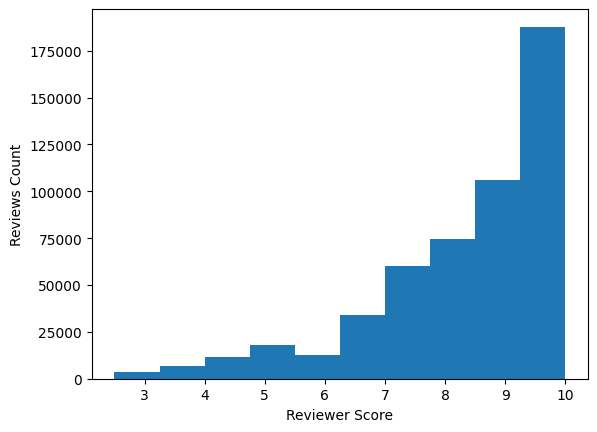

In [42]:
plt.hist(data["Reviewer_Score"])
plt.ylabel("Reviews Count")
plt.xlabel("Reviewer Score")
plt.show

The distribution is left skewed.

In [43]:
nationality_scores = pd.DataFrame(data.groupby('Reviewer_Nationality')['Reviewer_Score'].count().sort_values())
nationality_scores

,Reviewer_Score
Reviewer_Nationality,
Anguilla,1
Cape Verde,1
Comoros,1
Guinea,1
Svalbard Jan Mayen,1
...,...
United Arab Emirates,10235
Ireland,14827
Australia,21686


As we can see the reviews are not evenly distributed across the nationalities. Thus, we decided to also assign weights for each review based on the proportional number of reviews from each country. This apporach will allow us to avoid model overfitting and limit the influence of countries with few reviews.

In [44]:
reviews_per_country = data["Reviewer_Nationality"].value_counts()
country_weights = reviews_per_country/reviews_per_country.mean()
data['Country_Weight'] = data['Reviewer_Nationality'].map(country_weights)

We use nationality and the weight as our independent variables and the high rating varible as target.

In [45]:
X = data[["Reviewer_Nationality", "Country_Weight"]]
y = data["High_Rating"]

For the nationality varible we use one hot encoding to create dummy variables.

In [46]:
X = pd.get_dummies(X, columns=["Reviewer_Nationality"], drop_first=True)

Although we are more interested in feature importance than in the classifying model, we split the data with a shuffle and test size of 0.3 to evalute if the features are predictive.

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=4)

We can see that the training set is imbalanced.

In [48]:
pd.DataFrame(y_train)["High_Rating"].value_counts()

High_Rating
1    205786
0    155230
Name: count, dtype: int64

We use radnom undersampling to address this issue.

In [49]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(replacement=True)
X_train_sub,y_train_sub = rus.fit_resample(X_train, y_train)

We train the random forest classfier. We do not limit the max_depth to avoid omitting some nationalities.

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=4, n_jobs=-1, n_estimators=200)
rf.fit(X_train_sub, y_train_sub)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=4)

In [51]:
from sklearn.metrics import classification_report
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.51      0.38      0.43     66534
           1       0.61      0.72      0.66     88188

    accuracy                           0.57    154722
   macro avg       0.56      0.55      0.55    154722
weighted avg       0.56      0.57      0.56    154722



We also experiment with one Decision Tree.

In [52]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=4)
dt.fit(X_train_sub,y_train_sub)

DecisionTreeClassifier(random_state=4)

In [53]:
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.38      0.43     66534
           1       0.61      0.72      0.66     88188

    accuracy                           0.57    154722
   macro avg       0.56      0.55      0.55    154722
weighted avg       0.56      0.57      0.56    154722



The results are almost identical to random forest with 200 estimators as for one Decision Tree which requires shorter computation time.

We also train Logistic Regression Model with default L2 regularization.

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=4, max_iter=100000)

In [55]:
lr.fit(X_train_sub, y_train_sub, sample_weight= X_train_sub["Country_Weight"])

LogisticRegression(max_iter=100000, random_state=4)

In [56]:
y_pred = lr.predict_proba(X_test)[:,1] > 0.5
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.43      0.46     66534
           1       0.61      0.67      0.64     88188

    accuracy                           0.57    154722
   macro avg       0.55      0.55      0.55    154722
weighted avg       0.56      0.57      0.56    154722



All models tend to label reviews as high even after undersampling which result in higher recall of positve cases. The models score quite good conisdering it is based only on the nationality. What we are more interested in is the bias of the nationality on this predicition. To inspect that we decided to utilise our logistic regression model and more specifiaclly to we extract coefficients. Positive coefficient indicated the nationality is more lenient and tends to score higher. Similarly, negative coefficient indicates the nationality tends to score lower.

Considering the fact that the model will not be used for predicitons and only to understand the influence of nationality on the score , we decided to train the Logistic Regression model again using the whole dataset to get more information before extracting coefficients.

In [57]:
lr.fit(X, y, sample_weight= X["Country_Weight"])

coefficients = lr.coef_[0]

feature_names = X_train_sub.columns

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})


In [58]:
top_10_positive_bias = coef_df.sort_values(by = "Coefficient", ascending=0).head(10)
top_10_negative_bias = coef_df.sort_values(by = "Coefficient", ascending=1).head(10)

In [59]:
relevent_countries = pd.concat([top_10_negative_bias, top_10_positive_bias], axis = 0)

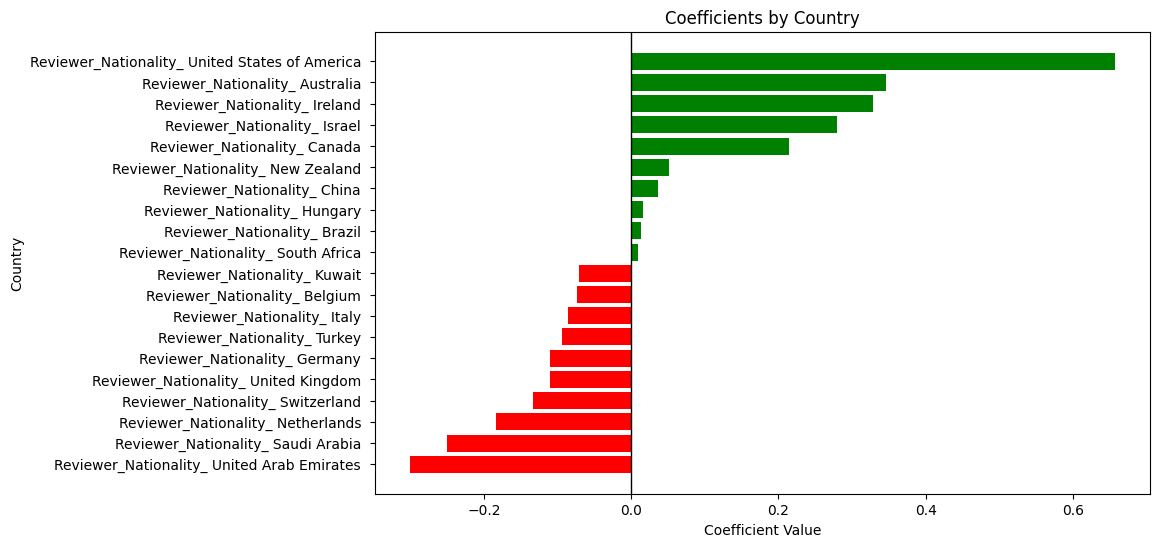

In [60]:
relevant_countries = relevent_countries.sort_values(by="Coefficient", ascending=True)

colors = relevant_countries["Coefficient"].apply(lambda x: "green" if x > 0 else "red")

plt.figure(figsize=(10, 6))
plt.barh(relevant_countries["Feature"], relevant_countries["Coefficient"], color=colors)
plt.axvline(0, color='black', linewidth=1)
plt.title("Coefficients by Country")
plt.xlabel("Coefficient Value")
plt.ylabel("Country")
plt.show()

# 2. Identifying the most popular leisure and business locations using clustering.

The goal of this experiment is to identify places in Europe with higher density of business or leisure hotels. We hope to identify pattern within specific regions or cities.

We begin with checking for missing values in business or leisure tags, so the clients who in the review did not select neither of these options.

In [61]:
filtered_hotels = data[(data["Leisure_trip"] == 0) & (data["Business_trip"] == 0)]

print(len(filtered_hotels))


15021


As we can see there are hotels with neither of these tags. We decided to drop them because of their (relatively to the size of dataset) small size.

In [62]:
data_2 = data[~((data["Leisure_trip"] == 0) & (data["Business_trip"] == 0))]

Now for each hotel we calculate the proportion of the business and leisure tags in the reviews. We make an assumption that the proportion in the sample (recorded reviews) is the same in the population. After many experiments, we have decided to approach this problem by calculating the ratio of leisure and business and mulitply them by total number of reveis for each hotel.

To avoid division by zero we added in both cases 1 to the denominator.

In [73]:
grouped_hotels = data_2.groupby(["Hotel_Name", "Hotel_Address"]).agg(
    business_tags=("Business_trip", "sum"),
    leisure_tags=("Leisure_trip", "sum"),
    total_reviews=("Total_Number_of_Reviews", "mean"),
    lat = ("lat", "mean"),
    lng = ("lng", "mean")
).reset_index()

grouped_hotels["business_index"] = grouped_hotels["business_tags"]/(grouped_hotels["leisure_tags"]+1)
grouped_hotels["leisure_index"] = grouped_hotels["leisure_tags"]/(grouped_hotels["business_tags"]+1)

grouped_hotels["business_tags_prop"] = grouped_hotels["total_reviews"]*grouped_hotels["business_index"]
grouped_hotels["leisure_tags_prop"] = grouped_hotels["total_reviews"]*grouped_hotels["leisure_index"]

grouped_hotels


,Hotel_Name,Hotel_Address,business_tags,leisure_tags,total_reviews,lat,lng,business_index,leisure_index,business_tags_prop,leisure_tags_prop
0,11 Cadogan Gardens,11 Cadogan Gardens Sloane Square Kensington an...,27,131,393.0,51.493616,-0.159235,0.204545,4.678571,80.386364,1838.678571
1,1K Hotel,13 Boulevard Du Temple 3rd arr 75003 Paris France,31,115,663.0,48.863932,2.365874,0.267241,3.593750,177.181034,2382.656250
2,25hours Hotel beim MuseumsQuartier,Lerchenfelder Stra e 1 3 07 Neubau 1070 Vienna...,109,570,4324.0,48.206474,16.354630,0.190893,5.181818,825.422067,22406.181818
3,41,41 Buckingham Palace Road Westminster Borough ...,9,92,244.0,51.498147,-0.143649,0.096774,9.200000,23.612903,2244.800000
4,45 Park Lane Dorchester Collection,45 Park Lane Westminster Borough London W1K 1P...,7,19,68.0,51.506371,-0.151536,0.350000,2.375000,23.800000,161.500000
...,...,...,...,...,...,...,...,...,...,...,...
1489,citizenM London Bankside,20 Lavington Street Southwark London SE1 0NZ U...,338,1151,3802.0,51.505151,-0.100472,0.293403,3.395280,1115.517361,12908.855457
1490,citizenM London Shoreditch,6 Holywell Lane Hackney London EC2A 3ET United...,240,579,2113.0,51.524137,-0.078698,0.413793,2.402490,874.344828,5076.460581
1491,citizenM Tower of London,40 trinity square City of London London EC3N 4...,475,1172,4672.0,51.510237,-0.076443,0.404945,2.462185,1891.901108,11503.327731
1492,every hotel Piccadilly,39 Coventry Street Westminster Borough London ...,69,483,1685.0,51.510146,-0.131506,0.142562,6.900000,240.216942,11626.500000


We decided to experiment with K-means and DBSCAN for clustering.

## K-means

We aim to create 3 clusters: business destination, leisure destinantion and mix.

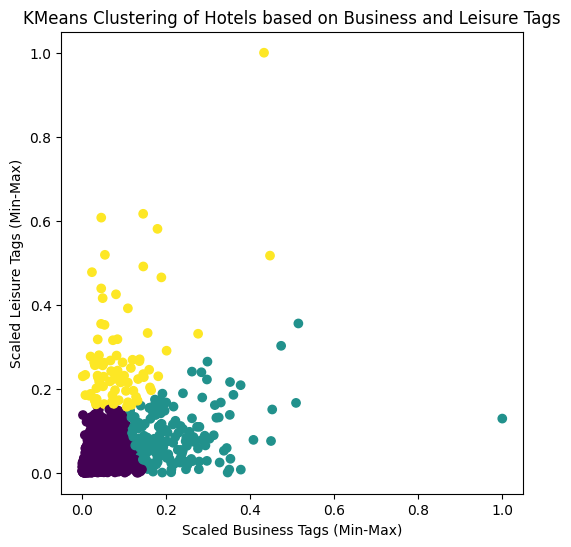

In [70]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

x = grouped_hotels[["business_tags_prop", "leisure_tags_prop"]]

# We scale the data using minmax scaler
x_scaled = MinMaxScaler().fit_transform(x)

# We fit the model
km = KMeans(n_clusters=3, random_state=4)
km.fit(x_scaled)

# We plot the model
plt.figure(figsize=(8, 6))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=km.labels_, cmap='viridis')
plt.title('KMeans Clustering of Hotels based on Business and Leisure Tags')
plt.xlabel('Scaled Business Tags (Min-Max)')
plt.ylabel('Scaled Leisure Tags (Min-Max)')
plt.gca().set_aspect("equal")
plt.show()


In [64]:
cluster_centers = km.cluster_centers_

for i, center in enumerate(cluster_centers):
    print(f"Cluster {i}: Business Tags Prop = {center[0]:.2f}, Leisure Tags Prop = {center[1]:.2f}")


Cluster 0: Business Tags Prop = 0.04, Leisure Tags Prop = 0.03
Cluster 1: Business Tags Prop = 0.21, Leisure Tags Prop = 0.08
Cluster 2: Business Tags Prop = 0.09, Leisure Tags Prop = 0.28


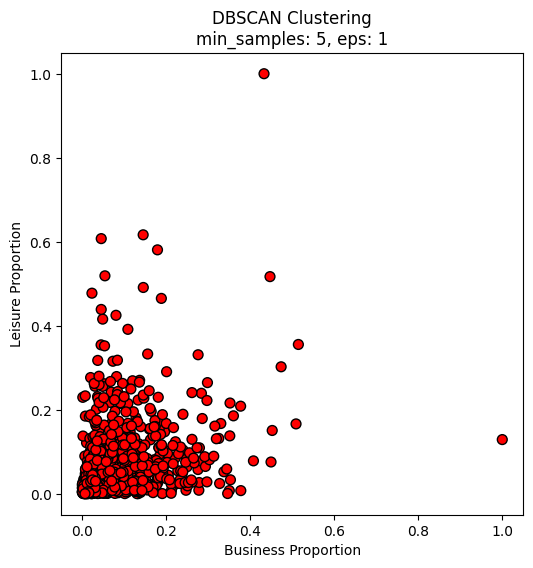

In [65]:
import numpy as np
from sklearn.cluster import DBSCAN

# parameters
min_samples = 5
eps = 1
db = DBSCAN(eps=eps, min_samples=min_samples)

clusters = db.fit_predict(x_scaled)

colors = ['r', 'g', 'b', 'k', 'cyan']
markers = ['o', '^', 'v']

if np.any(clusters == -1):
    c = ['w'] + colors
    clusters = clusters + 1 
else:
    c = colors
    markers = markers

# We plot the clusters
plt.figure(figsize=(8, 6))
c = np.array(c)
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=c[clusters], s=10, edgecolor="k")

core_samples = db.core_sample_indices_
if len(core_samples):
    plt.scatter(x_scaled[core_samples, 0], x_scaled[core_samples, 1], 
                c=c[clusters[core_samples]], s=50, edgecolor="k", marker='o')

plt.title(f"DBSCAN Clustering\nmin_samples: {min_samples}, eps: {eps}")
plt.xlabel('Business Proportion')
plt.ylabel('Leisure Proportion')
plt.gca().set_aspect("equal")
plt.show()


After mulitple experiments, we have decided to abandon the DBSCAN model since it is not effective for our data.

Becasue of the nature of our problem and features we use ("business_tags_prop", "leisure_tags_prop"), we have decided to continue with k-means model with three clusters. It effectively clusters observations with high leisure proportion and low business and vice versa, as well as the cluster near 0.0 meaning the hotel has either little reviews (not popular) or balanced number of leisure and business tags, or both.

We assign the cluster label to each hotel. As we saw earlier, mix hotels are labeled 0, business-heavy hotels are labeled 1 and leisure-heavy hotels are labeled 2.

In [66]:
grouped_hotels["cluster_label"] = km.labels_

grouped_hotels

,Hotel_Name,Hotel_Address,business_tags,leisure_tags,total_reviews,lat,lng,business_index,leisure_index,business_tags_prop,leisure_tags_prop,cluster_label
0,11 Cadogan Gardens,11 Cadogan Gardens Sloane Square Kensington an...,27,131,393.0,51.493616,-0.159235,0.204545,4.678571,80.386364,1838.678571,0
1,1K Hotel,13 Boulevard Du Temple 3rd arr 75003 Paris France,31,115,663.0,48.863932,2.365874,0.267241,3.593750,177.181034,2382.656250,0
2,25hours Hotel beim MuseumsQuartier,Lerchenfelder Stra e 1 3 07 Neubau 1070 Vienna...,109,570,4324.0,48.206474,16.354630,0.190893,5.181818,825.422067,22406.181818,1
3,41,41 Buckingham Palace Road Westminster Borough ...,9,92,244.0,51.498147,-0.143649,0.096774,9.200000,23.612903,2244.800000,0
4,45 Park Lane Dorchester Collection,45 Park Lane Westminster Borough London W1K 1P...,7,19,68.0,51.506371,-0.151536,0.350000,2.375000,23.800000,161.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1489,citizenM London Bankside,20 Lavington Street Southwark London SE1 0NZ U...,338,1151,3802.0,51.505151,-0.100472,0.293403,3.395280,1115.517361,12908.855457,1
1490,citizenM London Shoreditch,6 Holywell Lane Hackney London EC2A 3ET United...,240,579,2113.0,51.524137,-0.078698,0.413793,2.402490,874.344828,5076.460581,1
1491,citizenM Tower of London,40 trinity square City of London London EC3N 4...,475,1172,4672.0,51.510237,-0.076443,0.404945,2.462185,1891.901108,11503.327731,1
1492,every hotel Piccadilly,39 Coventry Street Westminster Borough London ...,69,483,1685.0,51.510146,-0.131506,0.142562,6.900000,240.216942,11626.500000,0


At the end we visualise this cluster on the map, hoping to see some patterns.

We use folium library to do that

In [ ]:
import folium

# we set colors for our clusters
colors = {0:"gray", 1: "blue", 2: "orange"}

# we initiate map with a center in Amsterdam and zoom so we could see the whole Europe
m = folium.Map([52.377956, 4.897070], zoom_start=4)

# for every hotel we add a marker in the color corresponding to its cluster
for hotel in range(len(grouped_hotels)):
    color = colors[grouped_hotels.iloc[hotel]["cluster_label"]]
    lat = grouped_hotels.iloc[hotel]["lat"]
    lng = grouped_hotels.iloc[hotel]["lng"]
    folium.Marker(
    location=[lat, lng],
    icon=folium.Icon(color=color),
    ).add_to(m)

m

For the ease of analysis we have also made a map without "mixed hotels" to extract only the most popular business and leisure hotels.

In [ ]:
import folium

# we set colors for our clusters
colors = {0:"gray", 1: "blue", 2: "orange"}

# we initiate map with a center in Amsterdam and zoom so we could see the whole Europe
m = folium.Map([52.377956, 4.897070], zoom_start=4)

# for every hotel we add a marker in the color corresponding to its cluster
for hotel in range(len(grouped_hotels)):
    color = colors[grouped_hotels.iloc[hotel]["cluster_label"]]
    lat = grouped_hotels.iloc[hotel]["lat"]
    lng = grouped_hotels.iloc[hotel]["lng"]
    folium.Marker(
    location=[lat, lng],
    icon=folium.Icon(color=color),
    ).add_to(m)

m

For the ease of analysis we have also made a map without "mixed hotels" to extract only the most popular business and leisure hotels.

In [102]:
# we set colors for our clusters
colors = {0:"gray", 1: "blue", 2: "orange"}

# we initiate map with a center in Amsterdam and zoom so we could see the whole Europe
m = folium.Map([52.377956, 4.897070], zoom_start=4)

# for every hotel we add a marker in the color corresponding to its cluster
for hotel in range(len(grouped_hotels)):
    if grouped_hotels.iloc[hotel]["cluster_label"] == 0:
        continue
    color = colors[grouped_hotels.iloc[hotel]["cluster_label"]]
    lat = grouped_hotels.iloc[hotel]["lat"]
    lng = grouped_hotels.iloc[hotel]["lng"]
    folium.Marker(
    location=[lat, lng],
    icon=folium.Icon(color=color),
    ).add_to(m)

m

The clusters combine the relative number of business tags to leisure tags and total number of reviews so in conclusion the visualised clusteres above the most popular hotels for business and leisure purposes from the data set.

# 3. Satisfaction Predicting Model

Our final goal is to create a predcitive model, which could be use for hotel recommendation. We aim for the model to predict the `Reviewer_Score`, potentially based on user input/characteristics. Based on the prediciton the model would recommend the most suitable hotel for user based on the reviews.

For this task we will create different linear regression models and evalute their performance.

We start with assigning the target variable `Reviewer_Score` and indepentend variables. In this case we decided to use: `Hotel_Country`, `Hotel_City`, `Nationality`, `Stay_Duration`, `Additional_Number_of_Scoring`, `Avergae_Score`, `Total_Number_of_Reviews` and tags related to the purpose of the trip (Business/Leisure) and the trip participants (solo traveler, couple, family with young children, familiy with older childern)

In [74]:
y = data["Reviewer_Score"]
X = data[[ "Average_Score", "Additional_Number_of_Scoring","Solo_traveler", "Couple", "Business_trip", "Leisure_trip"]]

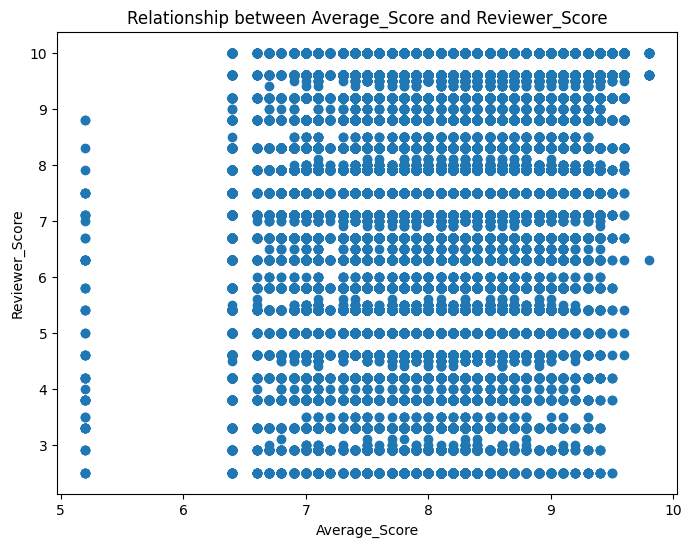

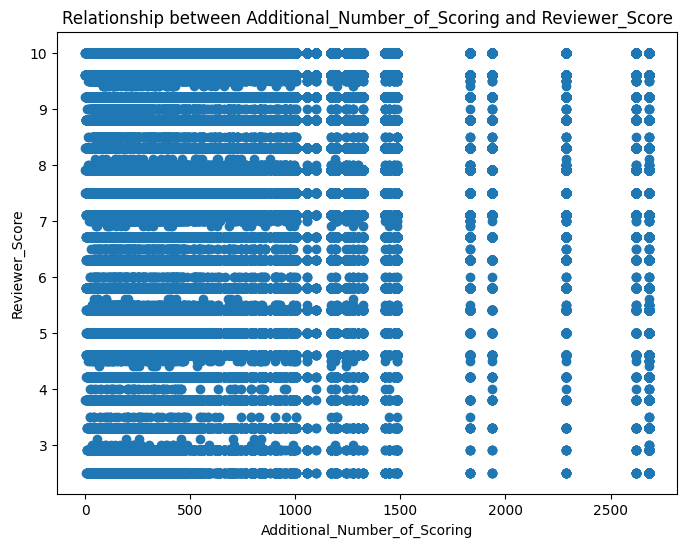

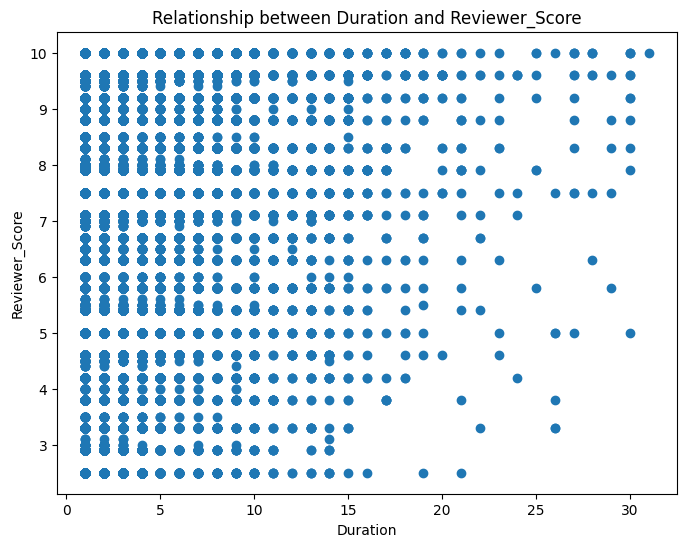

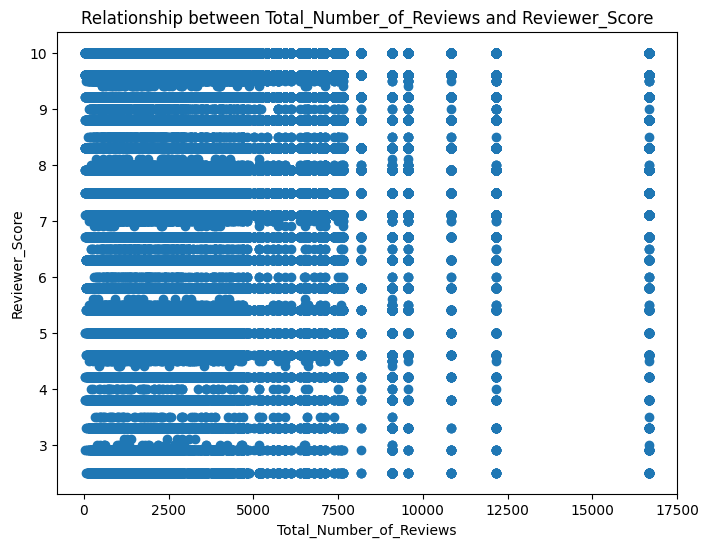

In [75]:
import matplotlib.pyplot as plt

# Scatter plot for numerical features vs. target
numerical_features = ["Average_Score", "Additional_Number_of_Scoring", "Duration", "Total_Number_of_Reviews"]
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(x=data[feature], y=data["Reviewer_Score"])
    plt.title(f"Relationship between {feature} and Reviewer_Score")
    plt.xlabel(feature)
    plt.ylabel("Reviewer_Score")
    plt.show()


As we can see there is no linear correlation between features and target variable. We decided to experiment with linear models, however at the end we changed the approach to the problem.

We create dummy variables for the categorical variables which are not yet hot one encoded

In [78]:
X = pd.get_dummies(X, columns=["Reviewer_Nationality"])

KeyError: "None of [Index(['Reviewer_Nationality'], dtype='object')] are in the [columns]"

We split the data with a shuffle and test size of 0.3.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True)

In [81]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

linear_regression = make_pipeline(StandardScaler(), LinearRegression())
ridge = make_pipeline(MinMaxScaler(), Ridge())


In [82]:
linear_regression.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [83]:
ridge.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('ridge', Ridge())])

In [84]:
linear_regression.score(X_test, y_test)

0.14047264162574014

In [85]:
ridge.score(X_test, y_test)

0.14047252172880154

In [86]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = linear_regression.predict(X_test)
print("Linear Reggression with no penalization:")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

Linear Reggression with no penalization:
R2 Score: 0.14047264162574014
MSE: 2.3046872746894183
MAE: 1.1769011155200164


In [87]:
y_pred = ridge.predict(X_test)
print("Ridge model")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")


Ridge model
R2 Score: 0.14047252172880154
MSE: 2.3046875961741806
MAE: 1.1769094188949751


As we can see the results are not satisfactory. Thus, our decision to change the approach to the problem and focus on classifying model.

# 3.2 Satisfaction Classifier

We have decided to change our approach for predicting client satisfaction. The new goal is to create a classifier that predicts whether a reviewer will be explicitly satisfied with the hotel (if the Reviewer_Score is 8.0 or higher) or not satisfied (if the Reviewer_Score is lower than 8.0).

We start with assigning the target variable `Reviewer_Score` and indepentend variables. In this case we decided to use: `Country`, `City`, `Reviewer_Nationality`, `Duration`, `Additional_Number_of_Scoring`, `Avergae_Score`, `Total_Number_of_Reviews` and tags related to the purpose of the trip (Business/Leisure) and reviewer type (solo traveler, couple, family with young children, familiy with older childern)

In [88]:
data["Satisfaction_Flag"] = data["Reviewer_Score"].apply(lambda x: 1 if x >=8 else 0)

In [89]:
y = data["Satisfaction_Flag"]
X = data[[ "Average_Score", "Additional_Number_of_Scoring","Solo_traveler", "Couple", "Business_trip", "Leisure_trip", "Country", "City", "Reviewer_Nationality", "Duration", "Total_Number_of_Reviews"]]

We create dummies for categorical variables.

In [90]:
X = pd.get_dummies(X, columns=[ "Country", "City", "Reviewer_Nationality"])

We split the data into test and train set. We use shuffle and test size of 0.3.

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=4)

We check for the balance of train set.

In [92]:
y.value_counts()

Satisfaction_Flag
1    335646
0    180092
Name: count, dtype: int64

As we can see the set is not balanced. Thus, when initializing our models we will use class-weights. For this task we decided to experiment with Logistic Regression and Random Forest classifiers becasue of high number of binary dummy predicitors.

We use scaling and pipelines for the models.

In [93]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
lr = make_pipeline(MinMaxScaler(), LogisticRegression(class_weight="balanced", max_iter=10000000))

In [94]:
lr.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced',
                                    max_iter=10000000))])

In [95]:
lr.score(X_test, y_test)

0.6496813639947777

We evalute the logistic regression model. Our goal is to have high precision for positive cases. That would mean the model hotel recommendations for suitable hotels are correct. However, we also want to leave reasonable recall so the model is not that strict to avoid no recommendation at all.

In [96]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(lr, X_train, y_train, cv = 5, scoring="roc_auc")
print(f"The mean AUC for logistic regression model is {np.mean(scores)}")

KeyboardInterrupt: 

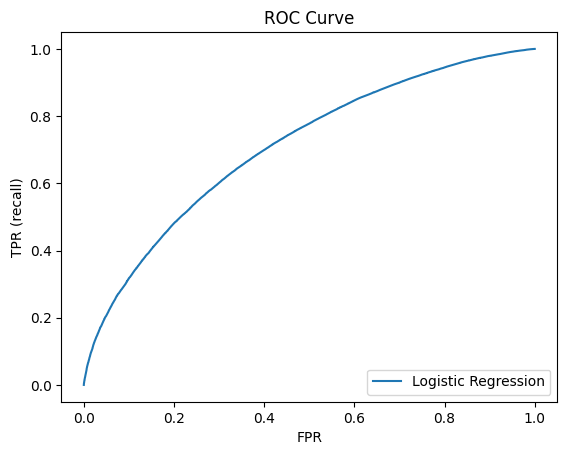

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="Logistic Regression")
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.legend(loc=4)

In [ ]:
y_pred = lr.predict_proba(X_test)[:,1] > 0.65
print(classification_report(y_test,y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.42      0.88      0.57     54050
           1       0.85      0.35      0.49    100672

    accuracy                           0.53    154722
   macro avg       0.63      0.62      0.53    154722
weighted avg       0.70      0.53      0.52    154722

[[47732  6318]
 [65659 35013]]


We have decided that the threshold of 0.65 would work well to achieve our goal of high precision of positive cases with not critically low recall.

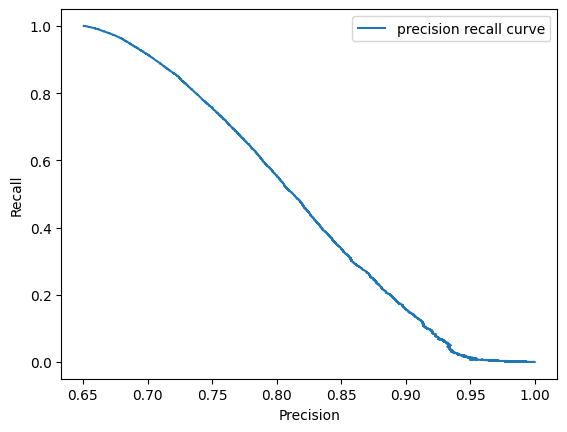

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test, lr.decision_function(X_test))
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

We also try to tune parameter C in our logistic regression model.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"logisticregression__C": [0.01, 0.1, 1, 10,]}
grid = GridSearchCV(lr, param_grid=param_grid, cv = 5, scoring="roc_auc")

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('logisticregression',
                                        LogisticRegression(C=0.1,
                                                           class_weight='balanced',
                                                           max_iter=10000000))]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10]},
             scoring='roc_auc')

In [ ]:
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

Best Parameters: {'logisticregression__C': 0.1}
Best Cross-Validation Score: 0.7085627772423908


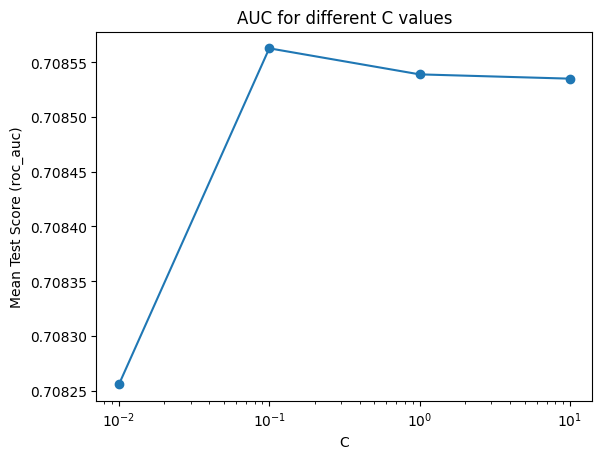

In [ ]:
mean_results = grid.cv_results_["mean_test_score"]
c_values = param_grid["logisticregression__C"]

plt.plot(c_values, mean_results, marker = "o")
plt.xscale("log") 
plt.xlabel("C")
plt.ylabel("Mean Test Score (roc_auc)")
plt.title("AUC for different C values")
plt.show()

As we can see the differences in ROC AUC are negligable.

We also fit random forrest classifier.

In [ ]:
rf = RandomForestClassifier(random_state=4)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=4)

In [ ]:
y_pred = rf.predict_proba(X_test)[:,1] > 0.65

In [ ]:
print(classification_report(y_test,y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.47      0.60      0.53     54050
           1       0.75      0.63      0.69    100672

    accuracy                           0.62    154722
   macro avg       0.61      0.62      0.61    154722
weighted avg       0.65      0.62      0.63    154722

[[32564 21486]
 [36896 63776]]


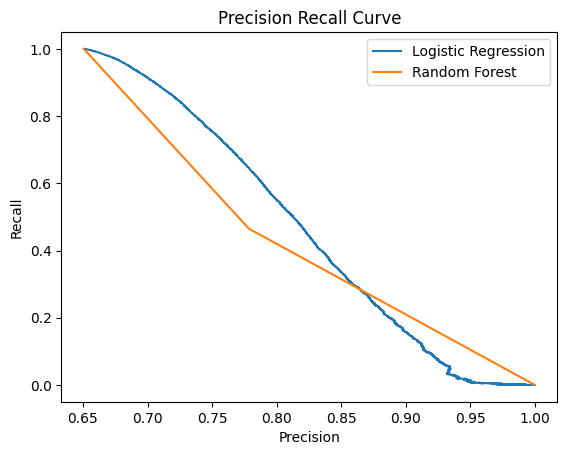

In [ ]:
precision, recall, thresholds = precision_recall_curve(
    y_test, lr.decision_function(X_test))
plt.plot(precision, recall, label="Logistic Regression")
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(precision, recall, label="Random Forest")
plt.title("Precision Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

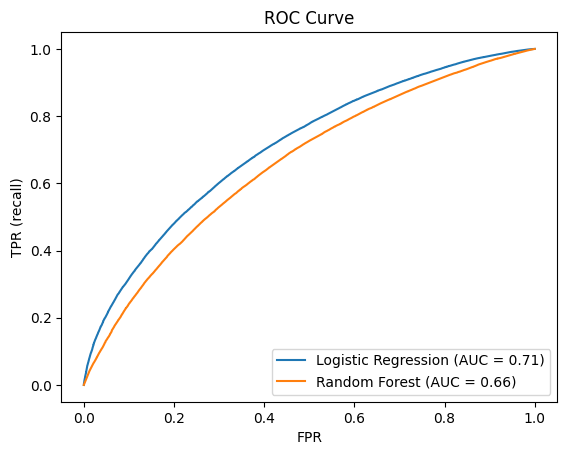

In [ ]:
from sklearn.metrics import roc_auc_score
auc_lr = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_rf:.2f})")

plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.legend(loc=4)

As we can see Random Forest perfoms slightly worse considering ROC and AUC, however for high precision it has higher recall than logisitc regression, which is our goal. Thus we decided to continue with this model.

Our final task is to try to implement the model for hotel recommendation. We decided to use the probability as an indicator of "how much a client would enjoy this hotel". We test it using 5 first records from the test set and by modifying hotel specific information for all hotels. We use the model to predict probabilities for each combination and sort them in descending order.

In [ ]:
all_hotels = data[["Hotel_Name", "Average_Score", "Additional_Number_of_Scoring", "Total_Number_of_Reviews", "Country", "City"]].drop_duplicates()

In [ ]:
all_hotels = pd.get_dummies(all_hotels, columns=["Country", "City"])

In [ ]:
# we test our approach on the 5 first clients from test data set. We create a dictionary {client index : best hotel}
test_clients_dict = {}
for client in range(5):  # Iterate over the first 5 rows
    results = []
    client_index = int(X_test.index[client])
    for i in range(len(all_hotels)):
        row = X_test.iloc[client]

        # hotel name
        hotel = all_hotels.iloc[i]
        hotel_name = hotel.iloc[0]

        # extracting other hotel attributes except name
        other_hotel_attributes_series = hotel[1:]
        hotel_attributes = pd.DataFrame([other_hotel_attributes_series.values], columns=other_hotel_attributes_series.index)

        # dropping hotel attributes from test set and substituing the attributes specific for the hotel in the loop
        row = pd.DataFrame([row.values], columns=row.index)
        row = row.drop(columns=hotel_attributes.columns)

        ## full test row = specific hotel characteristics + client characteristics
        test_row = pd.concat([row, hotel_attributes], axis = 1)
        
        # rearange the order of features to match the train set
        test_row = test_row[X_train.columns]

        # apply classifier to predicit satisfaction
        prediction = rf.predict_proba(test_row)[:,1]
       
        # append the predcition for class 1 to the and the hotel name to the results as tuple
        results.append((hotel_name, float(prediction[0])))

        # sort the results
        results = sorted(results, key=lambda x: x[1], reverse=True)

    test_clients_dict[client_index] = (results[0], results[1], results[2])


    

We display the best three hotels for each of the test clients. The model predicits with 100% probability that these people would enjoy the stay in these hotels. We also examined results for one client and all hotels and as we can see the probabilities range from 100% to 0%.

In [ ]:
print(test_clients_dict)

{np.int64(16238): (('Pullman Paris Centre Bercy', 1.0), ('Hotel L Antoine', 1.0), ('Shangri La Hotel Paris', 1.0)), np.int64(330421): (('One Aldwych', 1.0), ('Haymarket Hotel', 1.0), ('Hotel L Antoine', 1.0)), np.int64(118883): (('Milestone Hotel Kensington', 1.0), ('Knightsbridge Hotel', 1.0), ('The London EDITION', 1.0)), np.int64(149052): (('Apex Temple Court Hotel', 1.0), ('Splendid Etoile', 1.0), ('The Rembrandt', 1.0)), np.int64(33335): (('K K Hotel George', 1.0), ('Arbor City', 1.0), ('Ritz Paris', 1.0))}


In [ ]:
print(results)
print(results[0])
print(results[-1])


[('K K Hotel George', 1.0), ('Arbor City', 1.0), ('Ritz Paris', 1.0), ('The Rockwell', 1.0), ('H tel Ad le Jules', 1.0), ('Park Plaza Victoria London', 1.0), ('Le Roch Hotel Spa', 1.0), ('The Montcalm At Brewery London City', 1.0), ('Park Plaza London Waterloo', 1.0), ('La Chambre du Marais', 1.0), ('H tel Le Relais Saint Germain', 1.0), ('DoubleTree by Hilton London Chelsea', 1.0), ('Luxury Suites Amsterdam', 1.0), ('The Savoy', 1.0), ('The Ned', 0.9984615384615384), ('South Place Hotel', 0.9975), ('citizenM London Shoreditch', 0.9971428571428571), ('The Ampersand Hotel', 0.9966666666666666), ('Holiday Inn London Whitechapel', 0.9966666666666666), ('The Chelsea Harbour Hotel', 0.996), ('Comfort Inn Suites Kings Cross St Pancras', 0.995), ('Ambassadors Bloomsbury', 0.9940000000000001), ('Shangri La Hotel at The Shard London', 0.9929166666666667), ('London Hilton on Park Lane', 0.9908333333333332), ('Lansbury Heritage Hotel', 0.99), ('H tel Square Louvois', 0.99), ('Le Grey Hotel', 0.99

We believe our results are satisfactory. We acheived a model which allows us to make a ranking of hotels most suitable for each client. This way clients would get better recommendation while booking which would result in better choices and enhanced experience.